In [1]:
###··· CAR MPG DATASET ···### 
# Part 1: Selecting and analyzing the dataset
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


#Load the dataset
car_mpg_dataset = pd.read_csv("A1-car-mpg.txt", header=0, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
car_mpg_dataset.drop(columns=['Car_Model'], inplace=True)
print(car_mpg_dataset.isna())
car_mpg_dataset.dropna(inplace=True)

origin = car_mpg_dataset.pop('Origin')

car_mpg_dataset['USA'] = (origin == 1)
car_mpg_dataset['Europe'] = (origin == 2)
car_mpg_dataset['Japan'] = (origin == 3)

x = car_mpg_dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model_year', 'USA', 'Europe', 'Japan']]
y = car_mpg_dataset[["MPG"]]

#Scale the data 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)
validation_percentage=0.2

Epoch  1 / 500
============= [loss:  0.0468  - mae:  0.1837  - val_loss:  0.0417  - val_mae:   0.1711 ]
Epoch  2 / 500
============= [loss:  0.0445  - mae:  0.1789  - val_loss:  0.0404  - val_mae:   0.1655 ]
Epoch  3 / 500
============= [loss:  0.0439  - mae:  0.1774  - val_loss:  0.0403  - val_mae:   0.1643 ]
Epoch  4 / 500
============= [loss:  0.0438  - mae:  0.177  - val_loss:  0.0404  - val_mae:   0.1641 ]
Epoch  5 / 500
============= [loss:  0.0438  - mae:  0.1767  - val_loss:  0.0404  - val_mae:   0.1639 ]
Epoch  6 / 500
============= [loss:  0.0437  - mae:  0.1766  - val_loss:  0.0404  - val_mae:   0.1638 ]
Epoch  7 / 500
============= [loss:  0.0437  - mae:  0.1765  - val_loss:  0.0404  - val_mae:   0.1638 ]
Epoch  8 / 500
============= [loss:  0.0437  - mae:  0.1765  - val_loss:  0.0403  - val_mae:   0.1637 ]
Epoch  9 / 500
============= [loss:  0.0436  - mae:  0.1763  - val_loss:  0.0404  - val_mae:   0.1636 ]
Epoch  10 / 500
============= [loss:  0.0436  - mae:  0.1763  - v

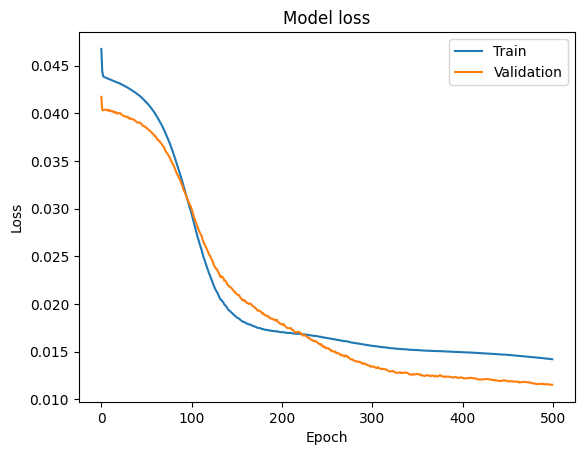

In [9]:
from matplotlib import pyplot as plt
from MyNeuralNetwork import MyNeuralNetwork

#Create the neural network and train
nn = MyNeuralNetwork(layers=[x_scaled.shape[1],4,4,1], nEpochs=500, learning_rate=0.005, momentum=0.5, activation='sigmoid', validation_set=validation_percentage)
nn.fit(x_scaled, y_scaled)

# Optional: Plot the evolution of the training and validation errors  
(loss, val_loss) = nn.loss_epochs()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

---Test---
R2 Score:  0.8053015110010269
MSE:  0.009264630593224644
MAE:  0.07220933063662824
---Train---
R2 Score:  0.8023859334645216
MSE:  0.008219299526677224
MAE:  0.06465829757414131

MAPE:  7256116328358.109


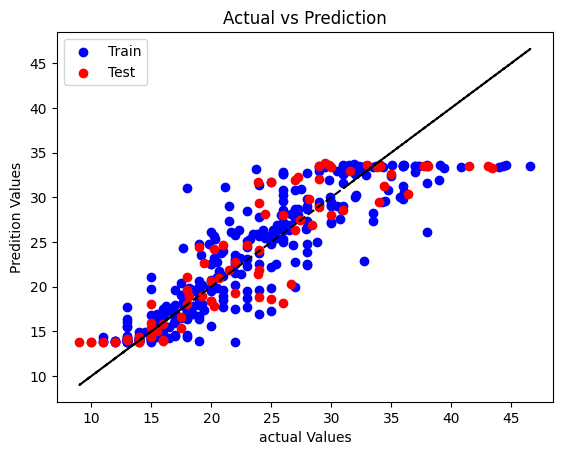

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


# Part 3: Obtaining predictions
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=validation_percentage, shuffle=True)
y_pred_test = nn.predict(x_test)
y_pred_train = nn.predict(x_train)

print("---Test---")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("---Train---")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test)
y_train_unscaled = scaler.inverse_transform(y_train)
y_pred_train_unscaled = scaler.inverse_transform(y_pred_train)

plt.scatter(y_train_unscaled, y_pred_train_unscaled, color="blue", label="Train")
plt.scatter(y_test_unscaled, y_pred_test_unscaled, color="red", label="Test")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")
plt.plot(y, y, "--",color="black")
plt.legend()
plt.show()